# Exploring Data

In [1]:
#Montar mi google drive para poder usar los archivos
#from google.colab import drive
#drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
#%cd /content/gdrive/My Drive/Ciencias/Data/Tools/Python-LabSOM
#!ls

/content/gdrive/My Drive/Ciencias/Data/Tools/Python-LabSOM
Datos_Clusters.txt	ngrok			      __pycache__
datos.txt		ngrok-stable-linux-amd64.zip  Python-LabSOM.gdoc
ExploringData.ipynb	paramsGP.txt		      RadarPlotDash.ipynb
geometricProfile.ipynb	profile.py		      Untitled.ipynb


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('datos.txt', sep=';', index_col=0, )
df.head()

Citations  Industry Income  International Outlook  Research  \
Name                                                                        
1 UC.CL            89.7             98.9                   92.3      99.8   
2 USP.BR           74.9             56.0                   59.9     100.0   
3 UNICAMP.BR       71.0             71.8                   57.1      99.9   
4 PUC-RIO.BR       67.5            100.0                   76.7      98.6   
5 ITESM.MX         75.6             99.9                   87.4      96.2   

              Teaching  
Name                    
1 UC.CL           75.1  
2 USP.BR          91.7  
3 UNICAMP.BR      92.6  
4 PUC-RIO.BR      84.1  
5 ITESM.MX        77.9

In [9]:
import seaborn as sns

pd.set_option("styler.format.precision", 2)

cm = sns.light_palette("lightblue", as_cmap=True)

if(len(df) > 50):
    s = df.head(50).style.background_gradient(cmap=cm)
else:
    s = df.style.background_gradient(cmap=cm)
s

In [ ]:
df.describe()

Citations  Industry Income  International Outlook  Research  Teaching
count      50.00            50.00                  50.00     50.00     50.00
mean       61.47            53.62                  50.44     77.53     71.57
std        23.15            20.69                  20.31     14.18     14.45
min        11.00            36.50                  18.90     40.10     40.80
25%        40.30            38.50                  31.10     67.38     62.60
50%        60.75            42.75                  48.00     80.10     72.30
75%        80.83            58.20                  67.53     86.80     83.52
max        99.80           100.00                  92.30    100.00     95.90

# Box Plots

In [ ]:

import plotly.express as px
import pandas as pd
import seaborn as sns

dft = df.copy()
dft['Name'] = dft.index

lis = []
for indicador in df.columns:
    fig = px.box(dft, y=indicador, hover_name='Name', points='all')
    
    lis.append(fig)



In [ ]:
import ipyvuetify as v
import plotly.graph_objs as go


#Display BoxPlots with ipyvuetify to make them responsive

v.Layout(row=True, wrap=True, align_center=True, children=[
            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in lis
                        
        ])
    

Layout(align_center=True, children=[Flex(children=[FigureWidget({
    'data': [{'alignmentgroup': 'True',
    …

# Plotly scatter matrix

In [ ]:
import plotly.express as px
listfigListPCA = []
indicators = df.columns
df['Name'] = df.index
figSM = px.scatter_matrix(df, dimensions=indicators, hover_name="Name")

listfigListPCA.append(figSM)

In [ ]:

v.Layout(row=True, wrap=True, align_center=True, children=[            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in listfigListPCA                        
        ])

Layout(align_center=True, children=[Flex(children=[FigureWidget({
    'data': [{'dimensions': [{'axis': {'matc…

In [ ]:
df.drop(columns=['Name'], inplace = True)#Quitar columna temporal

# Seaborn pairplot

https://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset

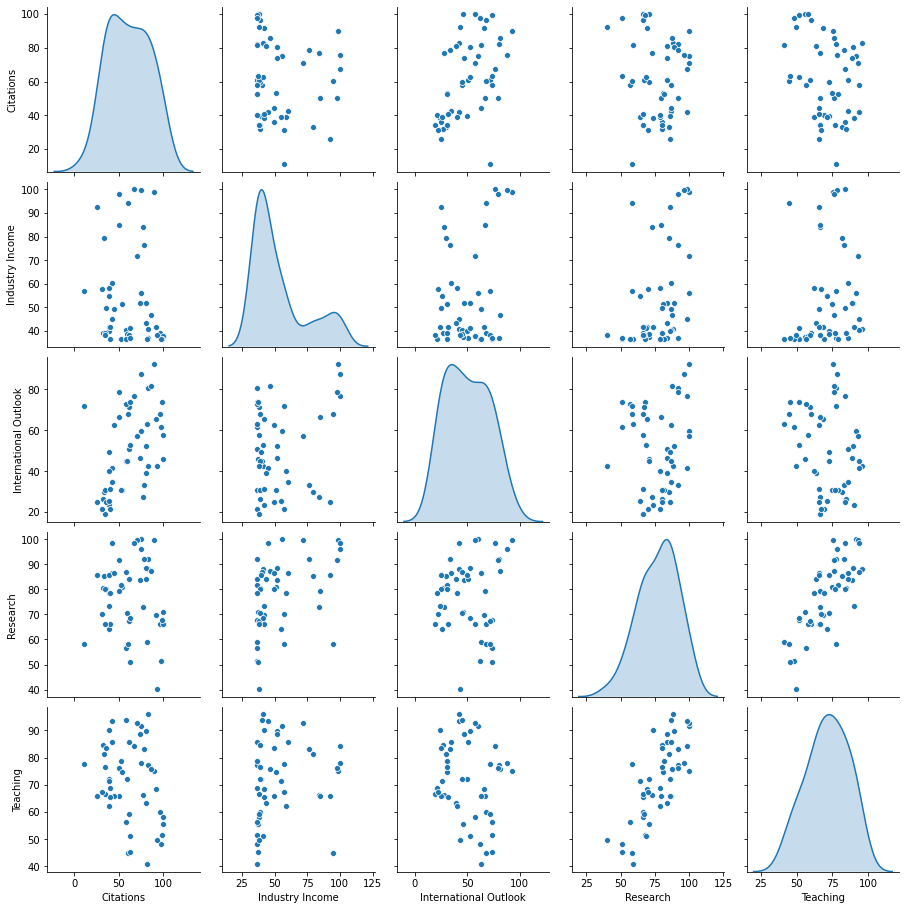

In [ ]:
import seaborn as sns

figS = sns.pairplot(df, diag_kind='kde')

# PCA

sklearn - StandardScaler +
Sklearn decomposition - PCA

Explaned variance [PC1, PC2]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2, svd_solver='full')
x_pca = pca.fit_transform(scaler.fit_transform(df))

print(pca.explained_variance_)

[2.07549446 1.57236675]


In [ ]:
df_pca = pd.DataFrame(index = df.index, columns=['PC1', 'PC2'])
for i in range(0,len(x_pca)):    
    df_pca.iloc[i] = x_pca[i]



__________
## 2D PCA projection

In [ ]:
import plotly.express as px

figListPCA = []

df_pca['Name'] = df_pca.index
fig = px.scatter(df_pca, x="PC1", y="PC2", text="Name")
figListPCA.append(fig)

In [ ]:
import plotly.express as px

df_pca['Name'] = df_pca.index
fig = px.scatter(df_pca, x="PC1", y="PC2", hover_data=['Name'])
figListPCA.append(fig)


In [ ]:

#Display scatterplots with ipyvuetify to make them responsive

v.Layout(row=True, wrap=True, align_center=True, children=[
            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in figListPCA
                        
        ])

Layout(align_center=True, children=[Flex(children=[FigureWidget({
    'data': [{'hovertemplate': 'PC1=%{x}<br>…